In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import math
#import tensorflow.compat.v1 as tf
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv(r"C:\Users\Fredrick.Alli\OneDrive - Badger Medical\TTCC.csv")

In [3]:
#To print the first 5 rows
data.head()

,Date,Total Cases
0,01/01/2022,411
1,02/01/2022,408
2,03/01/2022,435
3,04/01/2022,200
4,05/01/2022,242


In [4]:
#To print the last 5 rows
data.tail()

,Date,Total Cases
752,24/01/2024,300
753,25/01/2024,325
754,26/01/2024,241
755,27/01/2024,694
756,28/01/2024,481


In [5]:
#To see the data types 
data.dtypes

Date           object
Total Cases     int64
dtype: object

In [6]:
#Convert 'Date' column data type from object to datetime 
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [7]:
#To see if the data types have changed 
data.dtypes

Date           datetime64[ns]
Total Cases             int64
dtype: object

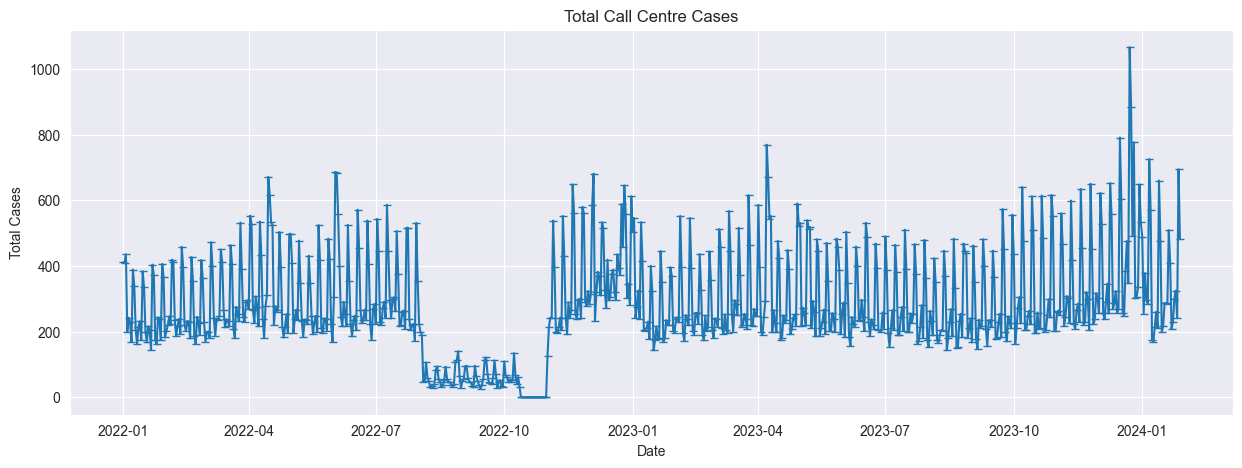

In [8]:
#Setting the plot size
plt.figure(figsize=(15, 5))

color_pal = sns.color_palette()

#Plotting the data 
#using trendline for the line style and marker for data point style 
plt.plot(data['Date'], data['Total Cases'], linestyle='-', marker='_', color=color_pal[0])

#Adding Title and Labels 
plt.title('Total Call Centre Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')

#Adding grid lines for better readability
plt.grid(True)

#Show the plot 
plt.show()

Testing for stationarlity

In [9]:
from statsmodels.tsa.stattools import adfuller 

In [10]:
test_result=adfuller(data['Total Cases'])

In [11]:
#It is stationary
#It is not stationary 

def adfuller_test(Total_Cases):
    result = adfuller(Total_Cases)
    labels = ['ADF', 'p-value', 'Lags used', 'Number of Observations used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(0), reject the null hypothesis. Data has no unit root is stationary")
    else: print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [12]:
adfuller_test(data['Total Cases'])

ADF: -2.271962711390203
p-value: 0.18117003384170194
Lags used: 20
Number of Observations used: 736
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


The hypothesis means the data is non stationary because it is > 0.05

Now, the data is non-stationary there are seven things we could actually do. 

Differencing the data: One common method to achieve stationarity is to difference the data. This involves subtracting the previous observation from the current observation. Sometimes, more than one round of differencing may be required. 

Transformation: Applying transformation such as logarithmic, square root or box-cox transformation can also hekp stabilise the variance of the time series and make it more stationary. 

Removing trends and seasonality: If the non-stationarity is due to a trend or seasonality, you might consider detrending or deaseasonalising the data. This can be done by model fitting or by using methods like Seasonal Decomposition. 

Re-test for stationarity: After applying the the transformations or differencing , you shpould re-run the ADF test to check if the data has become stationary. 

Model Building: Once the data is stationary, proceed to build time series forecasting nmodels such as ARIMA and SARIMA OR machine learning models depending on the nature of your data and the specific requirement of my analysis. 

Model Validation:  Validating the mdoel by checking its performance on unseen data. Use metrics like RMSE, MAE or MAPE to evaluate the forecasting accuracy. 

Forecasting: Use of validating models to forecast values. 

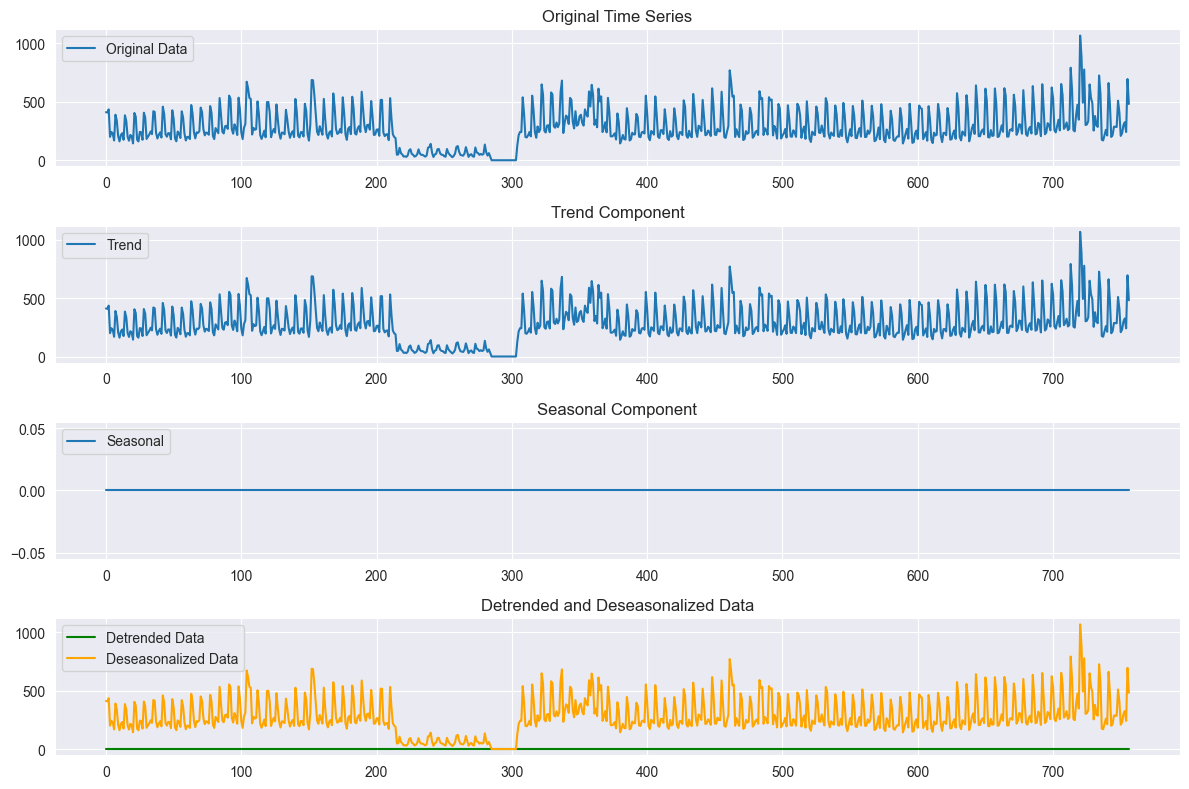

In [13]:
import statsmodels.api as sm

# Assuming you have your time series data in a variable called 'Total_Cases'
# You can use pandas to create a time series object if it's not already

Total_Cases = pd.Series(data['Total Cases'])

# To manually specify the frequency (assuming daily data)
period = 1

# Seasonal Decomposition using STL
decomposition = sm.tsa.seasonal_decompose(Total_Cases, model='additive', period=period)

# Detrended data
detrended_data = Total_Cases - decomposition.trend

# Deseasonalized data
deseasonalized_data = Total_Cases - decomposition.seasonal


# Plot the original, trend, seasonal, and detrended/deseasonalized data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(Total_Cases, label='Original Data')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(detrended_data, label='Detrended Data', color='green')
plt.plot(deseasonalized_data, label='Deseasonalized Data', color='orange')
plt.legend(loc='upper left')
plt.title('Detrended and Deseasonalized Data')

plt.tight_layout()
plt.show()

After Detrending the data You can print out the Adf test results

In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the detrended and deseasonalized data
adf_result = adfuller(deseasonalized_data)

# Extract and print the ADF test statistics
adf_statistic = adf_result[0]
p_value = adf_result[1]
lags_used = adf_result[2]
obs_used = adf_result[3]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Lags Used: {lags_used}')
print(f'Number of Observations Used: {obs_used}')

# Interpret the results
if p_value <= 0.05:
    print("Strong evidence against the null hypothesis(0), reject the null hypothesis. Data has no unit root; it is stationary.")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

ADF Statistic: -2.271962711390203
p-value: 0.18117003384170194
Lags Used: 20
Number of Observations Used: 736
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


Based on the output, the p-value (0.181) is greater than the significance level of 0.05. Thus, I have weak evidence against the null hypothesis, indicating that the time series still has a unit root and is non-stationary. This interpretation is accurate, and I can continue to analyse the non-stationary time series 

<Axes: >

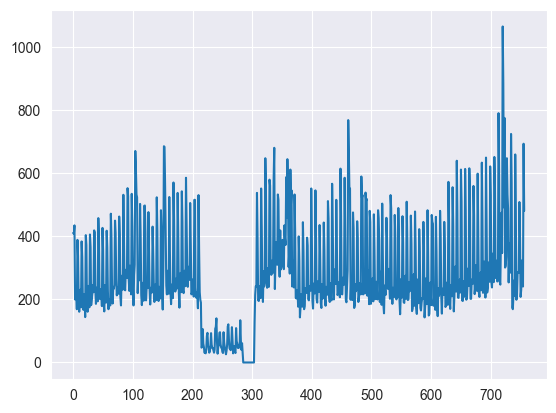

In [15]:
data["Total Cases"].plot(kind='line')

Using Auto-Regressive Model 

In [16]:
#Now you need to do auto correlation

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p, d, q 

p stands for AR model lags 
d stands for differencing 
q stands for moving average lag

Plotting the acf and pacf

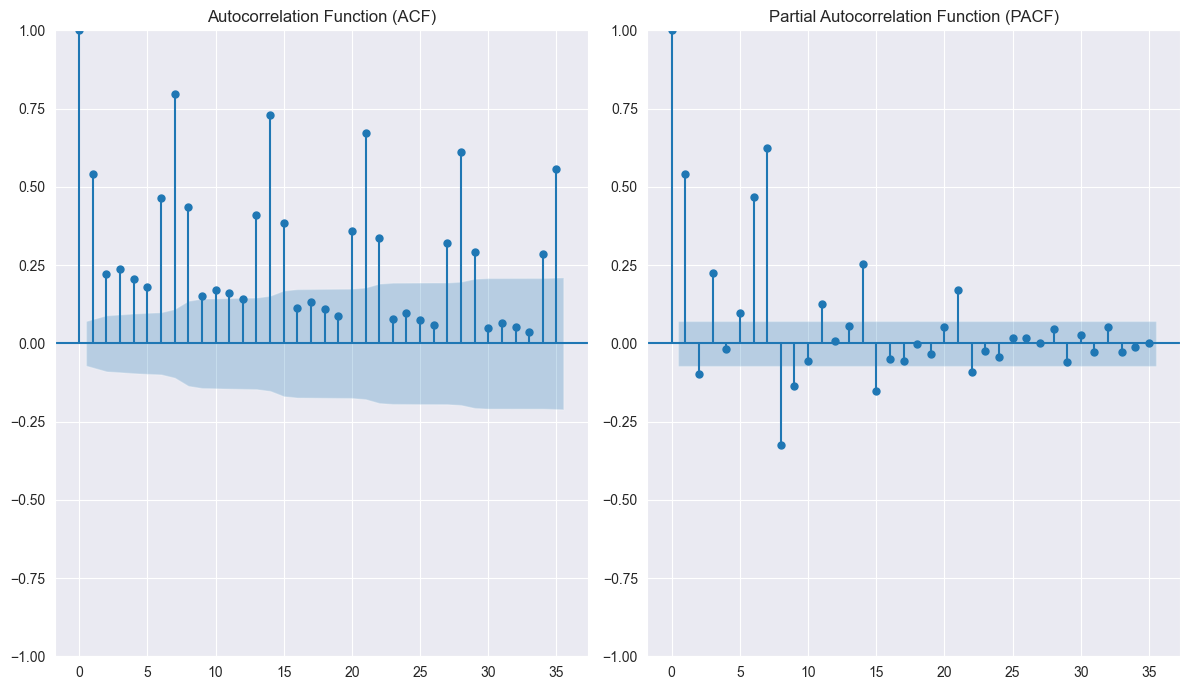

In [17]:
#Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plot_acf(deseasonalized_data, lags=35, ax=plt.gca()) #Adjust the 'lags' parameter as needed
plt.title('Autocorrelation Function (ACF)')

#Plotting the partial autocorrelation function (PACF)
plt.subplot(1, 2, 2)
plot_pacf(deseasonalized_data, lags=35, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

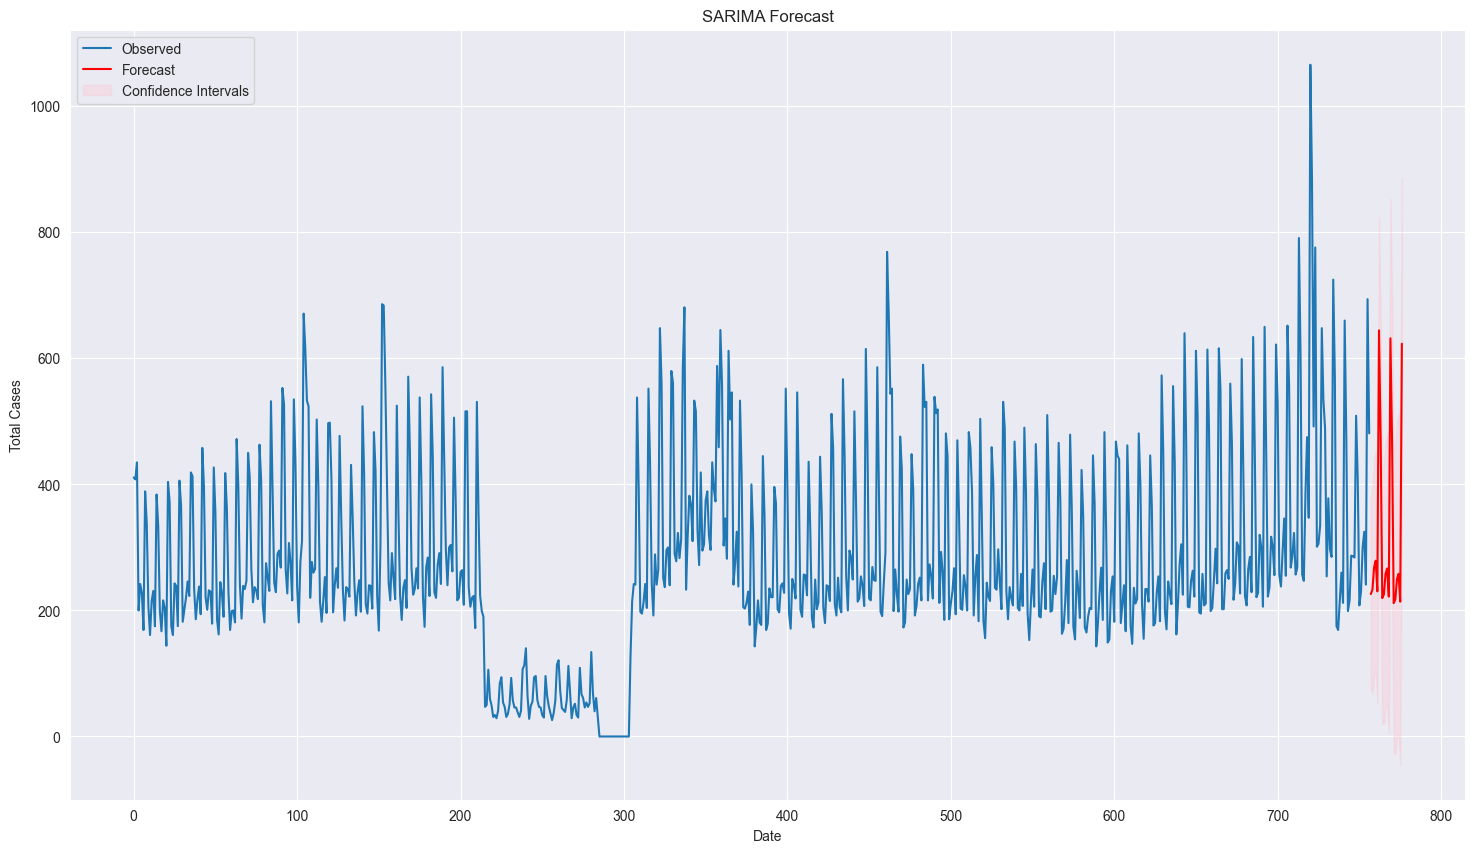

In [18]:
# Define SARIMA hyperparameters (p, d, q, P, D, Q, s)
p = 1  # AR order
d = 1  # Integration order
q = 1  # MA order
P = 1  # Seasonal AR order
D = 1  # Seasonal Integration order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (assuming weekly data)

# Fit SARIMA model
sarima_model = sm.tsa.SARIMAX(data['Total Cases'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

# Forecast future Total Cases
forecast_steps = 20  # Adjust as needed
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Get the forecasted values, confidence intervals, and prediction intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
lower_bound = confidence_intervals['lower Total Cases']
upper_bound = confidence_intervals['upper Total Cases']

# Plot the forecast
plt.figure(figsize=(18, 10))
plt.plot(data.index, data['Total Cases'], label='Observed')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_values.index, lower_bound, upper_bound, color='pink', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [19]:
# Print the forecast values
print("Forecasted Values:")
print(forecast_values)

# Print the confidence intervals
print("\nConfidence Intervals:")
print(confidence_intervals)

# Print the lower bounds
print("\nLower Bounds:")
print(lower_bound)

# Print the upper bounds
print("\nUpper Bounds:")
print(upper_bound)

Forecasted Values:
757    226.038297
758    232.833982
759    268.716012
760    278.932707
761    230.309796
762    644.470282
763    478.345192
764    219.544830
765    225.490343
766    257.957170
767    266.676449
768    221.951071
769    631.895268
770    470.884023
771    211.667618
772    217.521333
773    249.616329
774    258.172556
775    213.871928
776    623.356702
Name: predicted_mean, dtype: float64

Confidence Intervals:
     lower Total Cases  upper Total Cases
757          77.834564         374.242030
758          67.503594         398.164370
759          97.324963         440.107061
760         104.077537         453.787877
761          52.783702         407.835890
762         464.559495         824.381069
763         296.169199         660.521184
764          20.757721         418.331940
765          19.596457         431.384229
766          47.434180         468.480160
767          52.338840         481.014059
768           4.113942         439.788200
769         410

Home Visits Forecast 

In [20]:
home = pd.read_csv(r"C:\Users\Fredrick.Alli\OneDrive - Badger Medical\Home Cases.csv")
home.head()

,Date,HVs
0,01/04/2022,3
1,02/04/2022,22
2,03/04/2022,10
3,04/04/2022,0
4,05/04/2022,2


In [21]:
#To print the first 5 rows
home.head()

,Date,HVs
0,01/04/2022,3
1,02/04/2022,22
2,03/04/2022,10
3,04/04/2022,0
4,05/04/2022,2


In [22]:
#To see the data types 
home.dtypes

Date    object
HVs      int64
dtype: object

In [23]:
#Convert 'Date' column data type from object to datetime 
home['Date'] = pd.to_datetime(home['Date'], format='%d/%m/%Y')

In [24]:
home.dtypes

Date    datetime64[ns]
HVs              int64
dtype: object

Graph to see the Home Visit Cases

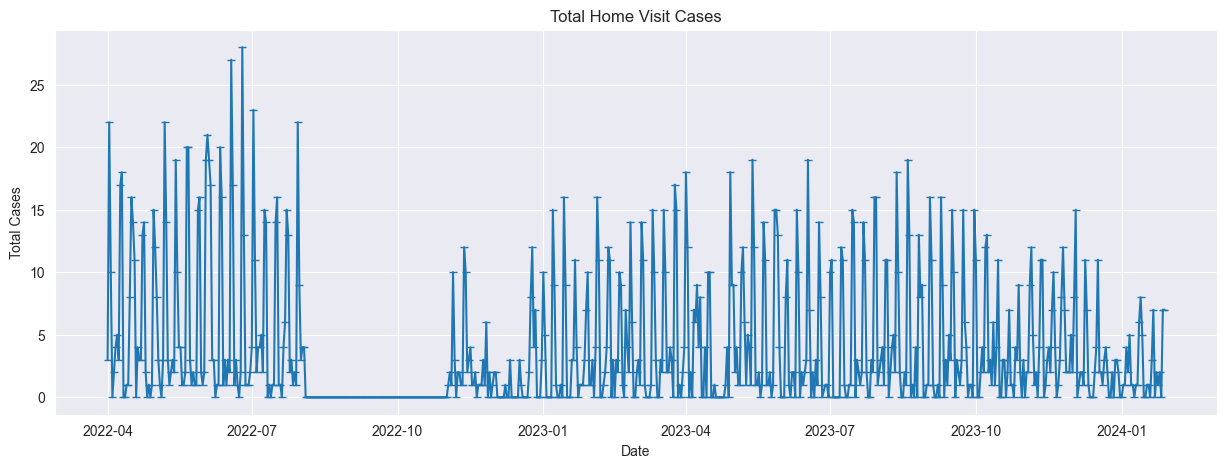

In [25]:
#Setting the plot size
plt.figure(figsize=(15, 5))

color_pal = sns.color_palette()

#Plotting the data 
#using trendline for the line style and marker for data point style 
plt.plot(home['Date'], home['HVs'], linestyle='-', marker='_', color=color_pal[0])

#Adding Title and Labels 
plt.title('Total Home Visit Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')

#Adding grid lines for better readability
plt.grid(True)

#Show the plot 
plt.show()

Testing for Stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(home['HVs'])

In [27]:
#It is stationary
#It is not stationary 

def adfuller_test(HVs):
    result = adfuller(HVs)
    labels = ['ADF', 'p-value', 'Lags used', 'Number of Observations used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print(
            "Strong evidence against the null hypothesis(0), reject the null hypothesis. Data has no unit root is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [28]:
adfuller_test(home['HVs'])

ADF: -2.584945163397811
p-value: 0.09614888763597013
Lags used: 14
Number of Observations used: 652
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


Based on the output, the p-value (0.096) is greater than the significance level of 0.05. Thus, I have weak evidence against the null hypothesis, indicating that the time series still has a unit root and is non-stationary. This interpretation is accurate, and I can continue to analyze the non-stationary time series 

Deseasonalised the data 

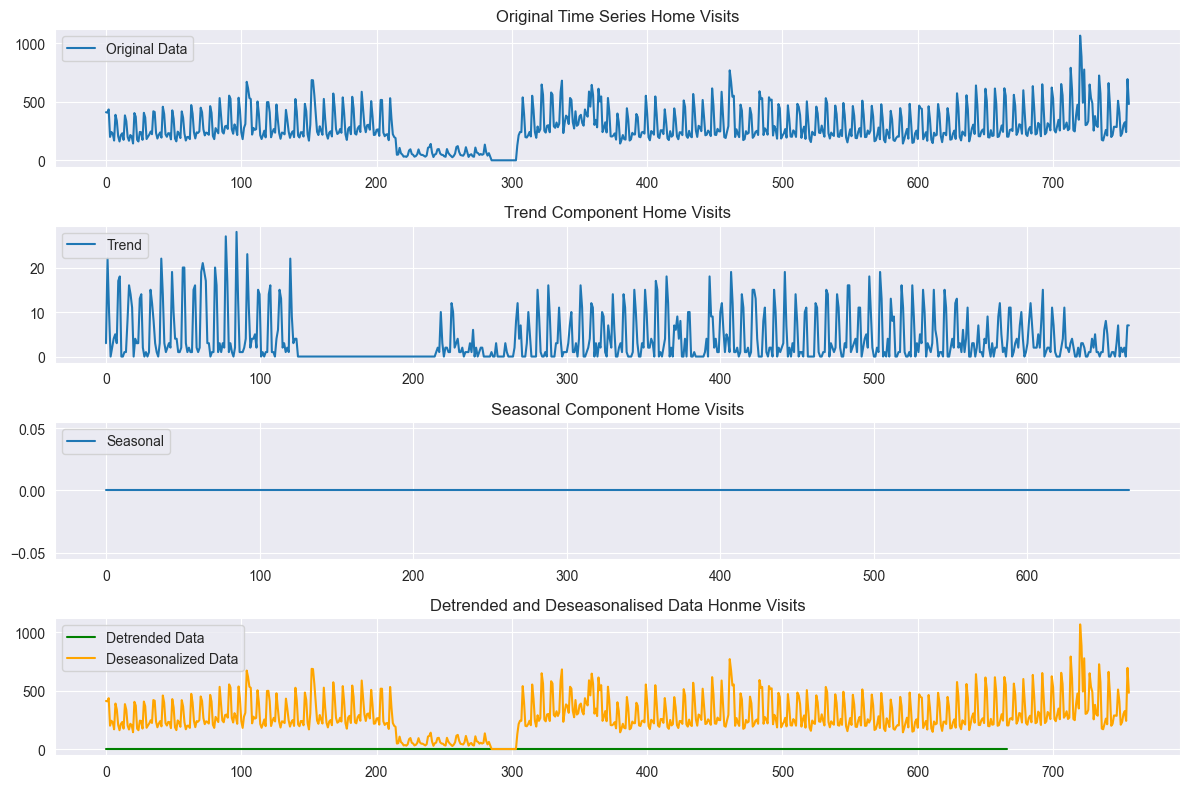

In [29]:
import statsmodels.api as sm

Total_Home_Cases = pd.Series(home['HVs'])

# To manually specify the frequency (assuming daily data)
period = 1

# Seasonal Decomposition using STL
decomposition = sm.tsa.seasonal_decompose(Total_Home_Cases, model='additive', period=period)

# Detrended data
detrended_data = Total_Home_Cases - decomposition.trend

# Deseasonalized data
deseasonalised_data = Total_Home_Cases - decomposition.seasonal


# Plot the original, trend, seasonal, and detrended/deseasonalised of home visits data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(Total_Cases, label='Original Data')
plt.legend(loc='upper left')
plt.title('Original Time Series Home Visits')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component Home Visits')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component Home Visits')

plt.subplot(4, 1, 4)
plt.plot(detrended_data, label='Detrended Data', color='green')
plt.plot(deseasonalized_data, label='Deseasonalized Data', color='orange')
plt.legend(loc='upper left')
plt.title('Detrended and Deseasonalised Data Honme Visits')

plt.tight_layout()
plt.show()

Now let's print out the Adfuler of the deseasonalized and detrended data

In [30]:
# Perform ADF test on the detrended and deseasonalized data
adf_result = adfuller(deseasonalised_data)

# Extract and print the ADF test statistics
adf_statistic = adf_result[0]
p_value = adf_result[1]
lags_used = adf_result[2]
obs_used = adf_result[3]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Lags Used: {lags_used}')
print(f'Number of Observations Used: {obs_used}')

# Interpret the results
if p_value <= 0.05:
    print("Strong evidence against the null hypothesis(0), reject the null hypothesis. Data has no unit root; it is stationary.")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

ADF Statistic: -2.584945163397811
p-value: 0.09614888763597013
Lags Used: 14
Number of Observations Used: 652
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


Based on the output, the p-value (0.096) is greater than the significance level of 0.05. Thus, I have weak evidence against the null hypothesis, indicating that the time series still has a unit root and is non-stationary. This interpretation is accurate, and I can continue to analyse the non-stationary time series 

Using Autoregressive Model 

In [31]:
#Now you need to do auto correlation

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p, d, q 

p stands for AR model lags 
d stands for differencing 
q stands for moving average lag

Plotting the Autocorrelation Function ACF and PACF

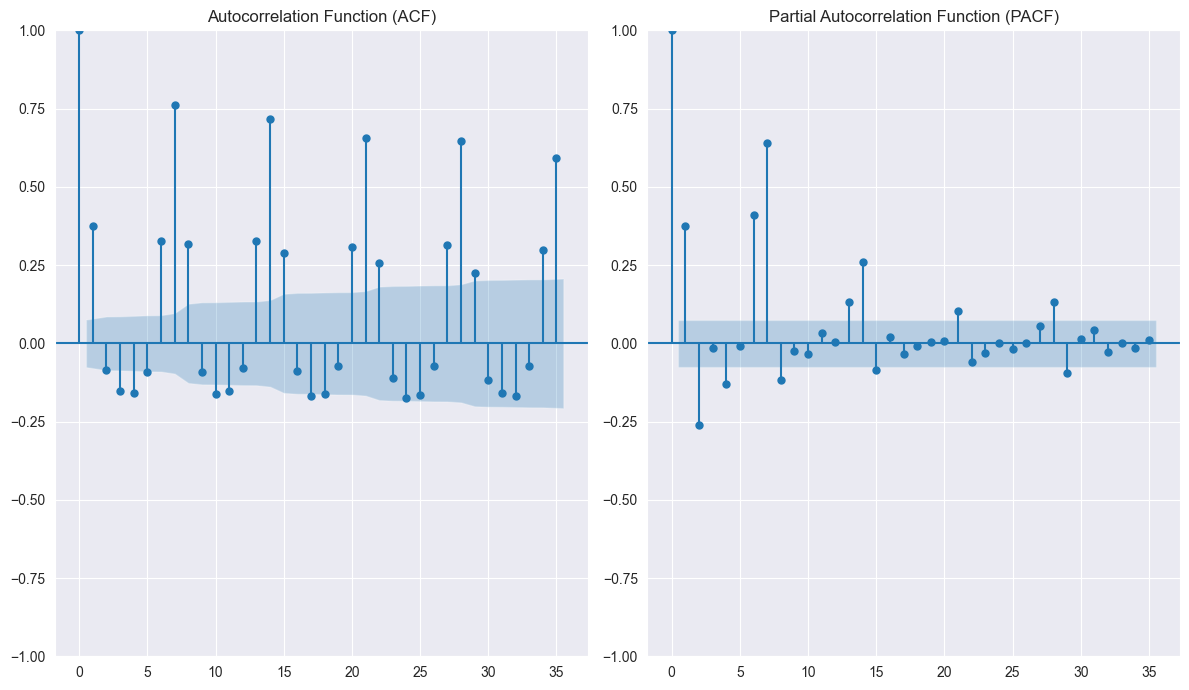

In [32]:
#Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plot_acf(deseasonalised_data, lags=35, ax=plt.gca())  #Adjust the 'lags' parameter as needed
plt.title('Autocorrelation Function (ACF)')

#Plotting the partial autocorrelation function (PACF)
plt.subplot(1, 2, 2)
plot_pacf(deseasonalised_data, lags=35, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

Now time for forecast 

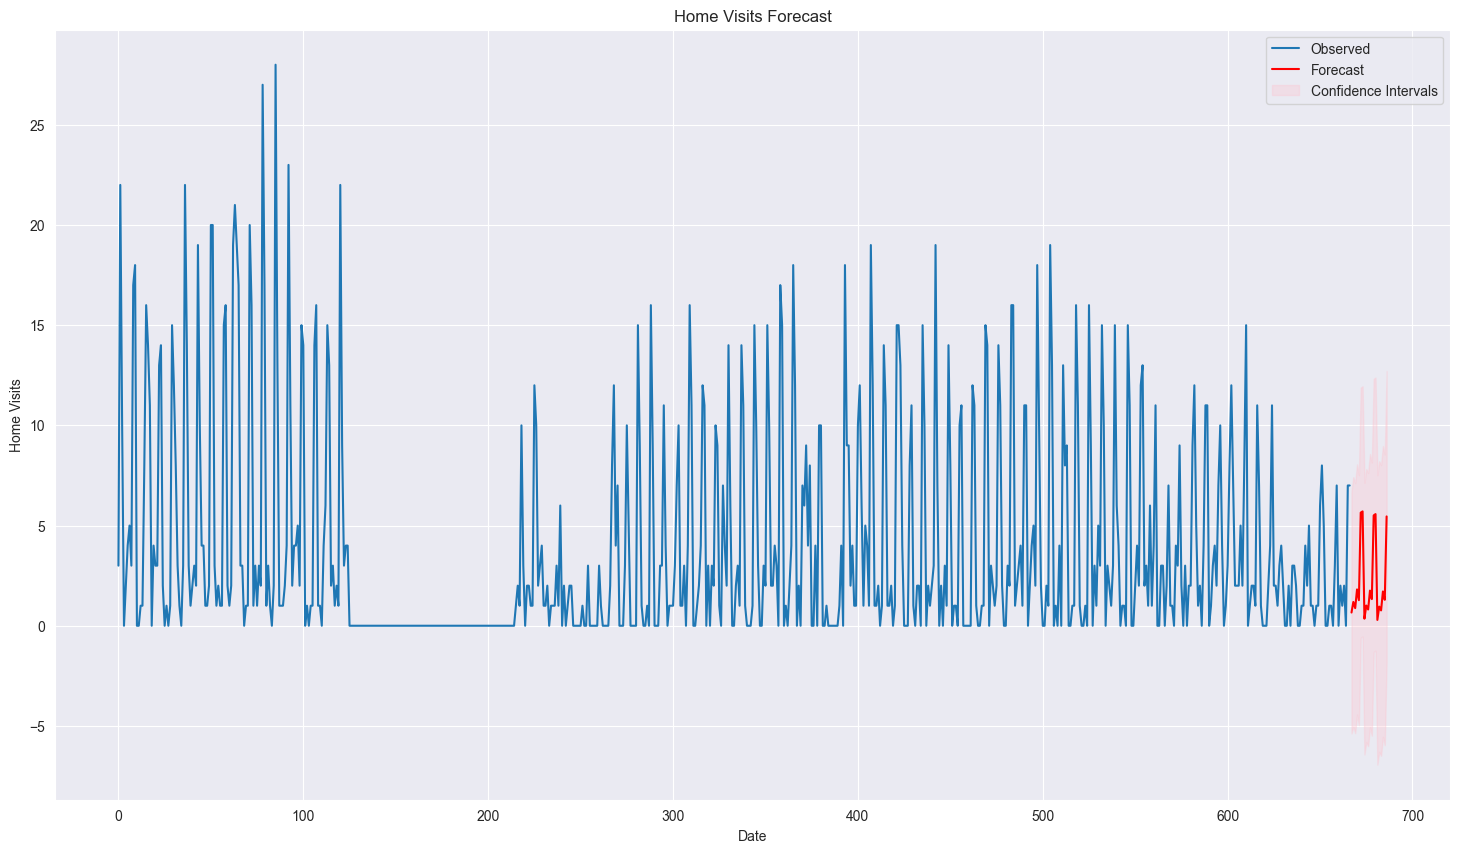

In [37]:
# Define SARIMA hyperparameters (p, d, q, P, D, Q, s)
p = 1  # AR order
d = 1  # Integration order
q = 1  # MA order
P = 1  # Seasonal AR order
D = 1  # Seasonal Integration order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (assuming weekly data)

# Fit SARIMA model
sarima_model = sm.tsa.SARIMAX(home['HVs'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

# Forecast future Total Cases
forecast_steps = 20  # Adjust as needed
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Get the forecasted values, confidence intervals, and prediction intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
lower_bound = confidence_intervals['lower HVs']
upper_bound = confidence_intervals['upper HVs']

# Plot the forecast
plt.figure(figsize=(18, 10))
plt.plot(home.index, home['HVs'], label='Observed')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_values.index, lower_bound, upper_bound, color='pink', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Home Visits')
plt.title('Home Visits Forecast')
plt.legend()
plt.show()

In [38]:
# Print the forecast values
print("Forecasted Values:")
print(forecast_values)

# Print the confidence intervals
print("\nConfidence Intervals:")
print(confidence_intervals)

# Print the lower bounds
print("\nLower Bounds:")
print(lower_bound)

# Print the upper bounds
print("\nUpper Bounds:")
print(upper_bound)

Forecasted Values:
667    0.660055
668    1.188342
669    0.878596
670    1.812551
671    1.277260
672    5.645168
673    5.706573
674    0.352613
675    1.009108
676    0.809863
677    1.754018
678    1.330350
679    5.505460
680    5.571628
681    0.290310
682    0.956258
683    0.765152
684    1.710059
685    1.294608
686    5.455526
Name: predicted_mean, dtype: float64

Confidence Intervals:
     lower HVs  upper HVs
667  -5.377317   6.697426
668  -5.040598   7.417283
669  -5.362927   7.120119
670  -4.429920   8.055022
671  -4.965308   7.519828
672  -0.597416  11.887751
673  -0.536014  11.949160
674  -6.427162   7.132388
675  -5.804764   7.822980
676  -6.006509   7.626235
677  -5.062597   8.570634
678  -5.486302   8.147003
679  -1.311200  12.322120
680  -1.245034  12.388290
681  -6.936328   7.516949
682  -6.297137   8.209654
683  -6.490306   8.020610
684  -5.545622   8.965740
685  -5.961110   8.550327
686  -1.800201  12.711253

Lower Bounds:
667   -5.377317
668   -5.040598
669   -5